# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
import requests
from scipy.stats import linregress as lg

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
query_url = f"{url}appid={weather_api_key}&units={units}&q="

cit = []
lat = []
lon = []
temp = []
hum = []
cld = []
wind = []
country = []
date = []
print('Beginning Data Retrieval')
print('-----------------------------')
count = 1
sets = 1
for city in cities:
    response = requests.get(query_url+str.title(city)).json()
    try:
        cit.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cld.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing Record {count} of Set {sets} | {city}')
        if count == 50:
            count = 1
            sets += 1
        else: 
            count += 1
    except:
        print('City not found. Skipping...')
        pass

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | charters towers
Processing Record 2 of Set 1 | sistranda
Processing Record 3 of Set 1 | hami
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | ahipara
Processing Record 6 of Set 1 | moskovskiy
Processing Record 7 of Set 1 | bathsheba
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | torbay
City not found. Skipping...
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | darhan
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 16 of Set 1 | alpena
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | maues
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | cabedelo
Processing Record 22 of Se

Processing Record 36 of Set 4 | namibe
Processing Record 37 of Set 4 | dikson
Processing Record 38 of Set 4 | sao gabriel da cachoeira
City not found. Skipping...
Processing Record 39 of Set 4 | houma
Processing Record 40 of Set 4 | sechura
Processing Record 41 of Set 4 | pisco
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | vienna
Processing Record 44 of Set 4 | nouadhibou
Processing Record 45 of Set 4 | faanui
Processing Record 46 of Set 4 | balkanabat
Processing Record 47 of Set 4 | san cristobal
Processing Record 48 of Set 4 | ballina
City not found. Skipping...
Processing Record 49 of Set 4 | fort nelson
Processing Record 50 of Set 4 | sao filipe
Processing Record 1 of Set 5 | verkhnyaya inta
Processing Record 2 of Set 5 | sur
Processing Record 3 of Set 5 | comodoro rivadavia
Processing Record 4 of Set 5 | yumen
City not found. Skipping...
Processing Record 5 of Set 5 | lavrentiya
City not found. Skipping...
Processing Record 6 of Set 5 | tieli
Processing R

Processing Record 21 of Set 8 | maldonado
Processing Record 22 of Set 8 | boa vista
Processing Record 23 of Set 8 | fare
Processing Record 24 of Set 8 | guiyang
Processing Record 25 of Set 8 | arkhara
Processing Record 26 of Set 8 | degtyarsk
Processing Record 27 of Set 8 | gravdal
Processing Record 28 of Set 8 | salalah
Processing Record 29 of Set 8 | abbeville
Processing Record 30 of Set 8 | kloulklubed
Processing Record 31 of Set 8 | tiarei
Processing Record 32 of Set 8 | shush
Processing Record 33 of Set 8 | koslan
Processing Record 34 of Set 8 | aykhal
Processing Record 35 of Set 8 | rorvik
Processing Record 36 of Set 8 | lampari
Processing Record 37 of Set 8 | aksu
Processing Record 38 of Set 8 | bahia blanca
Processing Record 39 of Set 8 | bombay
City not found. Skipping...
Processing Record 40 of Set 8 | san buenaventura
Processing Record 41 of Set 8 | murgab
Processing Record 42 of Set 8 | bellevue
Processing Record 43 of Set 8 | gazanjyk
Processing Record 44 of Set 8 | hay ri

Processing Record 11 of Set 12 | tessalit
Processing Record 12 of Set 12 | atambua
Processing Record 13 of Set 12 | taber
Processing Record 14 of Set 12 | matara
Processing Record 15 of Set 12 | zhigansk
Processing Record 16 of Set 12 | nha trang
Processing Record 17 of Set 12 | tambura
Processing Record 18 of Set 12 | vangaindrano
Processing Record 19 of Set 12 | banda aceh
Processing Record 20 of Set 12 | douentza
Processing Record 21 of Set 12 | cravo norte


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_dict = {
    'City': cit,
    'Lat': lat,
    'Lng': lon,
    'Max Temp':temp,
    'Humidity':hum,
    'Cloudiness':cld,
    'Wind Speed':wind,
    'Country':country,
    'Date':date
}
if not os.path.exists('output_data'):
    os.makedirs('output_data')
f = open(output_data_file, 'w')
city_data= pd.DataFrame(city_dict)
city_data.to_csv(output_data_file)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Charters Towers,-20.1000,146.2667,25.55,64,62,3.85,AU,1615033280
1,Sistranda,63.7256,8.8340,2.00,75,75,14.92,NO,1615033280
2,Kumul,42.8000,93.4500,7.54,49,36,2.24,CN,1615033280
3,Ancud,-41.8697,-73.8203,15.00,100,90,5.66,CL,1615033280
4,Ahipara,-35.1667,173.1667,17.43,87,100,3.20,NZ,1615033280


In [6]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,20.236647,15.653365,12.325884,70.730298,54.931699,3.836217,1.615033e+09
std,32.856671,91.032907,16.910777,22.811142,38.548405,2.660195,6.331243e+01
min,-54.800000,-175.200000,-33.790000,1.000000,0.000000,0.080000,1.615033e+09
25%,-5.803450,-66.957300,1.000000,63.000000,11.500000,1.995000,1.615033e+09
50%,22.890900,17.944200,17.340000,77.000000,75.000000,3.190000,1.615033e+09
75%,48.566750,96.096750,25.940000,87.000000,90.000000,5.140000,1.615033e+09
max,78.218600,178.416700,40.840000,100.000000,100.000000,19.540000,1.615033e+09


# Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_hum = city_data.loc[city_data['Humidity']> 100]
city_hum

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [44]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.loc[city_data['Humidity']<101]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

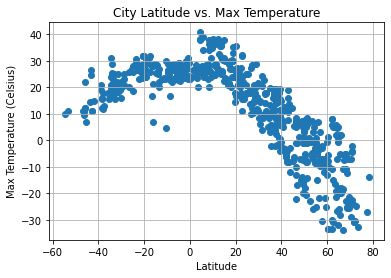

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(lat, temp, marker="o")
plt.title('City Latitude vs. Max Temperature')
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig('output_data/latvtemp.png')


## Latitude vs. Humidity Plot

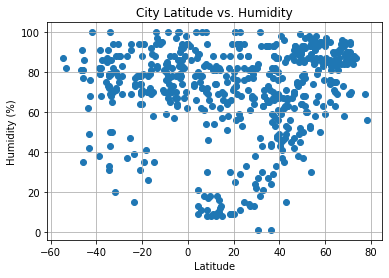

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(lat, hum, marker="o")
plt.title('City Latitude vs. Humidity')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig('output_data/latvhum.png')

## Latitude vs. Cloudiness Plot

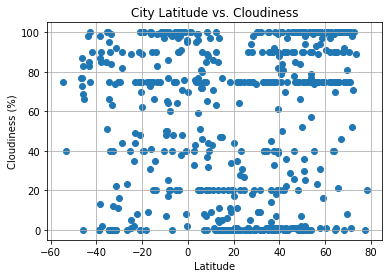

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(lat, cld, marker="o")
plt.title('City Latitude vs. Cloudiness')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig('output_data/latvcloud.png')

## Latitude vs. Wind Speed Plot

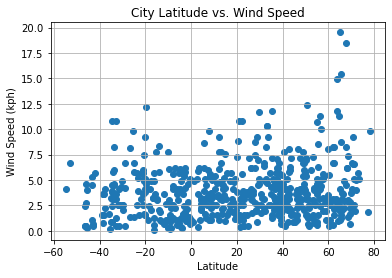

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(lat, wind, marker="o")
plt.title('City Latitude vs. Wind Speed')
plt.ylabel("Wind Speed (kph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig('output_data/latvwind.png')

## Linear Regression

In [13]:
north_data = city_data.loc[city_data['Lat']>= 0 ]
south_data = city_data.loc[city_data['Lat']< 0 ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

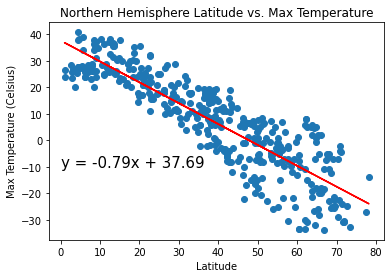

The r-value is: -0.8774656491574462
The r-squared is: 0.7699459654512985


In [15]:
x_ax = north_data['Lat']
y_ax = north_data['Max Temp']
plt.scatter(x_ax, y_ax, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = lg(x_ax, y_ax)
reg_val = x_ax * slope + intercept
leq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(leq,(0,-10),fontsize=15,color="black")
plt.plot(x_ax,reg_val,"r-")
plt.title('Northern Hemisphere Latitude vs. Max Temperature')
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.show()
print(f'The r-value is: {rvalue}')
print(f'The r-squared is: {rvalue**2}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

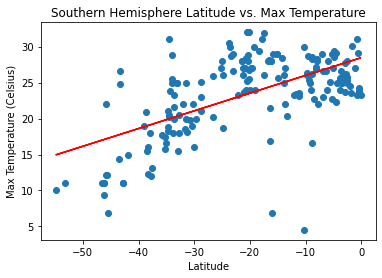

The r-value is: 0.5931272964937383
The r-squared is: 0.35179998984597094


In [16]:
x_ax = south_data['Lat']
y_ax = south_data['Max Temp']
plt.scatter(x_ax, y_ax, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = lg(x_ax, y_ax)
reg_val = x_ax * slope + intercept
leq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(leq,(-40,-0),fontsize=15,color="black")
plt.plot(x_ax,reg_val,"r-")
plt.title('Southern Hemisphere Latitude vs. Max Temperature')
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.show()
print(f'The r-value is: {rvalue}')
print(f'The r-squared is: {rvalue**2}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

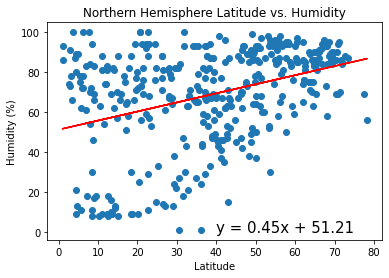

The r-value is: 0.3657864407480949
The r-squared is: 0.13379972023515954


In [17]:
x_ax = north_data['Lat']
y_ax = north_data['Humidity']
plt.scatter(x_ax, y_ax, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = lg(x_ax, y_ax)
reg_val = x_ax * slope + intercept
leq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(leq,(40,0),fontsize=15,color="black")
plt.plot(x_ax,reg_val,"r-")
plt.title('Northern Hemisphere Latitude vs. Humidity')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()
print(f'The r-value is: {rvalue}')
print(f'The r-squared is: {rvalue**2}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

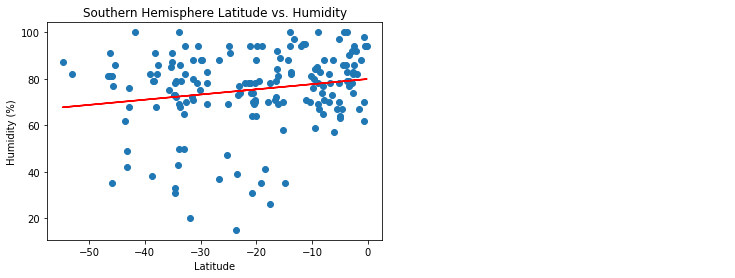

The r-value is: 0.18281041226195147
The r-squared is: 0.03341964683138465


In [18]:
x_ax = south_data['Lat']
y_ax = south_data['Humidity']
plt.scatter(x_ax, y_ax, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = lg(x_ax, y_ax)
reg_val = x_ax * slope + intercept
leq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(leq,(40,0),fontsize=15,color="black")
plt.plot(x_ax,reg_val,"r-")
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()
print(f'The r-value is: {rvalue}')
print(f'The r-squared is: {rvalue**2}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

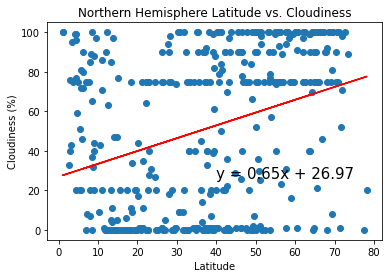

The r-value is: 0.3259538361959616
The r-squared is: 0.10624590333086376


In [19]:
x_ax = north_data['Lat']
y_ax = north_data['Cloudiness']
plt.scatter(x_ax, y_ax, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = lg(x_ax, y_ax)
reg_val = x_ax * slope + intercept
leq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(leq,(40,26),fontsize=15,color="black")
plt.plot(x_ax,reg_val,"r-")
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show()
print(f'The r-value is: {rvalue}')
print(f'The r-squared is: {rvalue**2}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

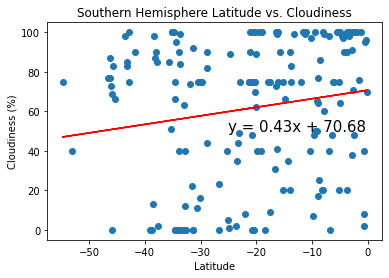

The r-value is: 0.1698468550636667
The r-squared is: 0.028847954175018203


In [20]:
x_ax = south_data['Lat']
y_ax = south_data['Cloudiness']
plt.scatter(x_ax, y_ax, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = lg(x_ax, y_ax)
reg_val = x_ax * slope + intercept
leq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(leq,(-25,50),fontsize=15,color="black")
plt.plot(x_ax,reg_val,"r-")
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show()
print(f'The r-value is: {rvalue}')
print(f'The r-squared is: {rvalue**2}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

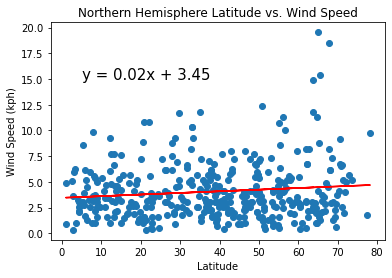

The r-value is: 0.11428162324452287
The r-squared is: 0.01306028941140307


In [21]:
x_ax = north_data['Lat']
y_ax = north_data['Wind Speed']
plt.scatter(x_ax, y_ax, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = lg(x_ax, y_ax)
reg_val = x_ax * slope + intercept
leq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(leq,(5,15),fontsize=15,color="black")
plt.plot(x_ax,reg_val,"r-")
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
plt.ylabel("Wind Speed (kph)")
plt.xlabel("Latitude")
plt.show()
print(f'The r-value is: {rvalue}')
print(f'The r-squared is: {rvalue**2}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

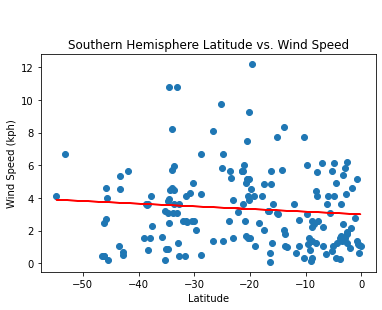

The r-value is: -0.0957733261163163
The r-squared is: 0.009172529995382274


In [22]:
x_ax = south_data['Lat']
y_ax = south_data['Wind Speed']
plt.scatter(x_ax, y_ax, marker="o")
(slope, intercept, rvalue, pvalue, stderr) = lg(x_ax, y_ax)
reg_val = x_ax * slope + intercept
leq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(leq,(-55,15),fontsize=15,color="black")
plt.plot(x_ax,reg_val,"r-")
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
plt.ylabel("Wind Speed (kph)")
plt.xlabel("Latitude")
plt.show()
print(f'The r-value is: {rvalue}')
print(f'The r-squared is: {rvalue**2}')